In [38]:
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [39]:
dfc = pd.read_csv('/Users/macbook/GA-DSI/curriculum/week-03/5.1-regression-challenge/datasets/challenge-dataset.csv')

In [40]:
dfs = pd.read_csv('/Users/macbook/GA-DSI/curriculum/week-03/5.1-regression-challenge/datasets/ranking-submission.csv')

In [41]:
dfc.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [13]:
dfs.head()

,world_rank,university_name,total_score
0,1,California Institute of Technology,NaN
1,2,University of Oxford,NaN
2,3,Stanford University,NaN
3,4,University of Cambridge,NaN
4,5,Massachusetts Institute of Technology,NaN


In [42]:
dfy = pd.DataFrame(dfc['total_score'])

In [57]:
dfc.dtypes

world_rank                  int64
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                    float64
total_score                object
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [49]:
dfc['num_students'] = dfc['num_students'].str.replace(',', '')

In [53]:
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)

In [55]:
dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')
dfc['world_rank'].fillna(value=100, inplace=True)
dfc['world_rank'] = dfc['world_rank'].astype(int)

In [56]:
#Set INCOME to Median of income without any '-'s
dfc.loc[dfc['income'] == '-', 'income'] = '41.0'
dfc['income'] = dfc['income'].astype(float)

In [64]:
dfc['international_students'] = dfc['international_students'].str.replace('%', '')
dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13
dfc['international_students'] = dfc['international_students'].astype(float)

In [66]:
dfc['international_students'].dtype

dtype('float64')

In [72]:
dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES
dfc['international'] = dfc['international'].astype(float)

In [82]:
dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS

In [73]:
dfc.dtypes

world_rank                  int64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score                object
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio          object
year                        int64
dtype: object

In [61]:
dfc.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,41.0,94.2,7929.0,8.4,27.0,45:55:00,2011


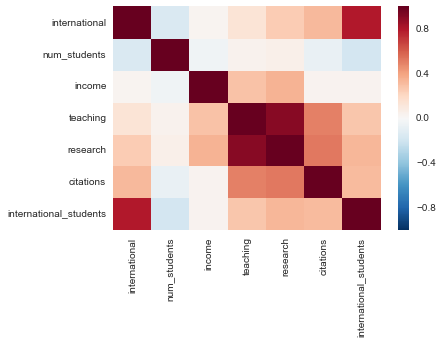

In [80]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', 'international_students']
df2 = dfc.copy()[cols]
#print df2
sns.heatmap(df2.corr())

In [83]:
dfy = dfc['total_score']
X = df2
y = dfy
lr = linear_model.LinearRegression()
lr_model = lr.fit(X,y)

ValueError: could not convert string to float: -

In [78]:
dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS

In [76]:
dfc_train = dfc[dfc['total_score'].notnull()]

In [79]:
dfc_train.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,41.0,94.2,7929.0,8.4,27.0,45:55:00,2011


/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


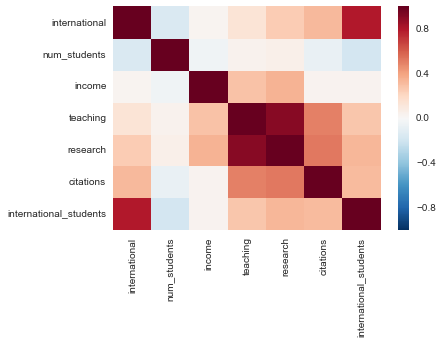

In [81]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', \
        'international_students', 'total_score']
df2 = dfc.copy()[cols]
dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]
dfc_X.drop('total_score', axis=1, inplace=True)
#print dfc_X.dtypes
dfc_train = dfc[(dfc['total_score'] != '-') & (dfc['total_score'].notnull())]
train_cols = ['total_score']
train = dfc_train.copy()[train_cols]

 
#print df2
sns.heatmap(df2.corr())

In [ ]:
df_y = dfc_train 
df_X = df2

In [ ]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', \
        'international_students', 'total_score']
df2 = dfc.copy()[cols]
dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]
dfc_X.drop('total_score', axis=1, inplace=True)
#print dfc_X.dtypes
dfc_train = dfc[(dfc['total_score'] != '-') & (dfc['total_score'].notnull())]
train_cols = ['total_score']
train = dfc_train.copy()[train_cols]

In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "import numpy as np\n",
    "import seaborn as sns\n",
    "import matplotlib as plt\n",
    "%matplotlib inline \n",
    "\n",
    "from sklearn import datasets\n",
    "from sklearn import linear_model\n",
    "from sklearn.metrics import r2_score\n",
    "from sklearn.cross_validation import train_test_split\n",
    "from sklearn.cross_validation import cross_val_score\n",
    "from sklearn.cross_validation import cross_val_predict"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "dfs = pd.read_csv('/Users/kristensu/dropbox/GA-DSI/DSI-copy/curriculum/week-03/5.1-regression-challenge/datasets/ranking-submission.csv')\n",
    "dfc = pd.read_csv('/Users/kristensu/dropbox/GA-DSI/DSI-copy/curriculum/week-03/5.1-regression-challenge/datasets/challenge-dataset.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {
    "collapsed": false
   },
   "outputs": [],
   "source": [
    "dfc.loc[dfc['income'] == '-', 'income'] = 41.0 #MEDIAN of NON-DASHES\n",
    "dfc['income'] = dfc['income'].astype(float)    \n",
    "dfc['international_students'] = dfc['international_students'].str.replace('%', '')\n",
    "dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13\n",
    "dfc['international_students'] = dfc['international_students'].astype(float)\n",
    "dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES\n",
    "dfc['international'] = dfc['international'].astype(float) \n",
    "dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')\n",
    "dfc['world_rank'].fillna(value=100, inplace=True) # *100* = MEDIAN of NON-DASHES\n",
    "dfc['world_rank'] = dfc['world_rank'].astype(int)\n",
    "dfc['num_students'] = dfc['num_students'].str.replace(',', '')\n",
    "dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)\n",
    "dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)\n",
    "dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS\n",
    "dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "dfc.dtypes"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "dfc.columns"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "train"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "dfc.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 124,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 1001 entries, 0 to 1602\n",
      "Data columns (total 9 columns):\n",
      "international             1001 non-null float64\n",
      "num_students              1001 non-null float64\n",
      "income                    1001 non-null float64\n",
      "teaching                  1001 non-null float64\n",
      "research                  1001 non-null float64\n",
      "citations                 1001 non-null float64\n",
      "international_students    1001 non-null float64\n",
      "total_score               1001 non-null object\n",
      "year                      1001 non-null int64\n",
      "dtypes: float64(7), int64(1), object(1)\n",
      "memory usage: 78.2+ KB\n",
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 800 entries, 1803 to 2602\n",
      "Data columns (total 8 columns):\n",
      "international             800 non-null float64\n",
      "num_students              800 non-null float64\n",
      "income                    800 non-null float64\n",
      "teaching                  800 non-null float64\n",
      "research                  800 non-null float64\n",
      "citations                 800 non-null float64\n",
      "international_students    800 non-null float64\n",
      "year                      800 non-null int64\n",
      "dtypes: float64(7), int64(1)\n",
      "memory usage: 56.2 KB\n",
      "[2016]\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: \n",
      "A value is trying to be set on a copy of a slice from a DataFrame\n",
      "\n",
      "See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy\n"
     ]
    },
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x11f88c510>"
      ]
     },
     "execution_count": 124,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAbsAAAFXCAYAAAA77+DnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XmcXFWZ//FPdZMQEsMWdsmgLPOVgYg6ioAYZJPFDUSB\nCIossgwOKvgTDTiiIygqMKiArA4IiqKDM8MSEBHDIig7SHxYAkxmwhokgJBAuuv3x7lFF013UtXL\nPVXV3/frdV+13Kp7n+p06ulz7jnPqVSrVczMzDpZV+4AzMzMRpuTnZmZdTwnOzMz63hOdmZm1vGc\n7MzMrOMtlzsAG75DK2/KPqT2qCfuyR0CAH83sTd3CHQvnJ87hOTxubkjYMmCx3OHAMDV+52SOwS2\nvv+PuUMAYNXJEyvDPUYz3zk/qj4y7PONBLfszMys47llZ2ZmTeluibZac5zszMysKd2V9st2TnZm\nZtaU8V1OdmZm1uHcjWlmZh3P3ZhmZtbx3LIzM7OO55admZl1vHacoO1kZ2ZmTWnHll07JuilkrST\npIMG2beKpBmjdN5Xjy3paEnvHKHjfk3SwSNxLDOzkTC+q9Lw1io6rmUXEVctZfdmwIeBn43CqV89\ndkScOArHNzNrCR6g0gIk7QfsDKwHzAM2AG6JiMOBmcBbi5bfLOAsYALwEnAw6edxGfAUcCWwK3An\nsCkwGfh4RMyTdALwj8AU4K6IOLDfsd9DSqjXAj8G1ie1ok+OiEsk/a6J45qZtRR3Y7aWjYD9gc2B\nD0haAzgeuDYizgG+B5waEdsBJwG11tgawI4R8d3i8S0RsSNwDTBD0mTgmYjYCXgXsKWktfsdu+YQ\n4MmIeA+wI/BNSVOaPK6ZWUvprjS+tYqOa9nVeTAiXgSQNJ/Ugqs3DZgp6WigArxSPP9wRPTUve6O\n4nYesCapFbimpIuAvwGTgHGDxLAx8BuAiHhB0hxSS3O4xzUzy8Ytu9ZSv95S7V+ml77PPAc4umjZ\nHQpcMsD7Bnq8CzA1IvYhdV1OLI5ff+ya+4DpAEXLbVOgtsjYso67Ql3cZmYtox1bdp2a7AZLWA8B\n0yQdAXwROE7SdcD5wN0DvHegBQpvAdYv3vfL4pjr9Dt27X1nA1MkXU+6fndcRDzd4HHnFsfNvjCr\nmVm9dkx2lWrV36XtziuV9/FK5XW8UvmrvFJ5n5FYqfwnq23c8HfOJ5+e0xIpr5Ov2ZmZ2SgYqWt2\nkirA6aSpW4uAgyJibt3+fYAjgSXAjyPiR0M9V6d2Y5qZ2SgZwW7M3YDlI2Ir4CvAyf32fxfYDtga\nOErSSkON2cnOzMya0l2pNLwtw9akOc9ExC1A/8pTdwGrkAbswTDGMDjZmZlZU0awZbcisLDu8RJJ\n9Xnpz8BtwD3AZRHx3FBjdrIzM7OmjGDL7jlSFamarojoBZA0DfgAqRrWm0jzkPcYasxOdmZm1pSu\nSqXhbRluJJVlRNIWpBZczULgRWBxRFSBJ0ldmkPi0ZhmZtaU7vEj1k66FNhR0o3F4/2L1WMmRcQ5\nks4CbpC0mDSX+d+HeiInOzMza0qle2SSXdFiO6zf0/fX7T8TOHMkzuVkZ2ZmTam0UmmUBjnZmZlZ\nU7qc7CyHVijVddKa03KHAMC3n78vdwisMHnN3CEAUJk0ZdkvGmXPbTgpdwgAbHD7x3OHwMTl2i9B\nDKbS1X5jG53szMysKW7ZmZlZx+sa3507hKY52ZmZWVPcsjMzs45X6XKyMzOzDtc1QvPsyuRkZ2Zm\nTfE8OzMz63hOdmZm1vHcjWlmZh2ve1z7Jbv2izgDSbtJWqvB10rS74Zwjk0lvbf56MzMylXp7mp4\naxWtE0lr+xxpRd1GDWXp+D2AfxjC+8zMStXVXWl4axVt1Y0paT/SQn8TgfWB7wCfBg6JiPslHQKs\nCZwP/ByYR1rl9ufApsDbgCsi4phBjr888AtSYpsIHAOML953gaRPAhdExJbF6/8A7AW8DFxUHOaJ\nuuNtA3wTWEJai+lQYJ9+n+FE4JricyyWdBuwO/A+oBv4VUR8d2g/MTOzkdeOA1TasWW3YkR8CPgI\n8GUGb0W9Gdgf+BDwr8DngS2AA5dy7A2AKcV7PgEsFxFXAHcAnyQltfrz1e4fA/w0IrYHfl23/yxg\n94jYFphPSmj9P8NXImI+aVHCkyPiVmBGsU0Hnl1KvGZmpXM3ZjnuLG7nARP67av/c2NuRLxAShaP\nR8TCiFgM9A524Ii4j5SgLgZOo+/nU6k7dv05avv/Hvhjcf9GAEmrA2sDvyiu4e0I/N0An2H5AULZ\nl9TimwWsPFi8ZmY5tGM3Zjsmu/4tuUXAOsX9dwzynsog919D0qbA5Ij4IKkV9oNiVy/pZ7UIWF1S\nRdLKpNYjwJ+BrYr7mxe3T5OS2UeKlt0JwLUDfIZaPL1Al6TxwMcjYkZEbEdapn7qYDGbmZWt0lVp\neGsVbXXNbgBV4PvA6ZIeBf6v375l3e/vAeBrkvYkJaGvFs/fBFwAvJ90fe1PwNzi9QDHAxdJ2gt4\nGNJy85I+D1whqQtYCHyKdA2x/2cAuI10DXIO8Iykm4EXgVkRMW8pMZuZlaq7DVc9qFSrQxk4aK3k\ngSefz/6P6MVb+6zQuyh3CABUepfkDoFnK62xeOtTL/bkDoENVh6XOwQAJqywwrCbW385aLeGv3Pe\ncs6vW6J51+4tuyGR9BnSAJTaP1iluP+ViLglW2BmZm3AK5W3iYg4Gzg7dxxmZu3I5cLMzKzjtdKU\ngkY52ZmZWVOc7MzMrOP5mp2ZmXW8rvGtMbK0GU52ZmbWlC637MzMrNP5mp2ZmXU8JzszM+t4HqBi\nWfzdxEEXcihNK5TpAvjy5Pzr335/9rdzhwBAz8IFuUNgpW32yR0CACu9IXcE0DN4Dfq245admZl1\nPCc7MzPreN3j2i91tF/EZmaWlVt2ZmbW8ZzszMys43k0ppmZdbyu7vZbqdzJzszMmjJS3ZiSKsDp\nwGbAIuCgiJg7wOvOBBZExMyhnqv92qJmZpZV17jlGt6WYTdg+YjYCvgKcHL/F0g6BNh02DEP9wBj\niaSdJB2UOw4zs5wq3V0Nb8uwNTALICJuAd5Zv1PSlsC7gDOHG7O7MZsQEVfljsHMLLcRHI25IrCw\n7vESSV0R0StpLeBrpNbfXsM9kZNdEyTtB+wMrAfMAzYA/hgR/yRpNeB8YOXi5Z8CngYuJP2DdgPH\nRsR1ku4GZgNvBf4CPAFMJ/VZ7wpMAs4FVi2O9bmIuHf0P6GZ2bKN4GjM54DJdY+7IqJW//DjwBTg\nCmBtYAVJf4mIC4ZyIndjDs1GwP7A5sAuktYAjgX+MyLeAxxV7DsWuDoitgH2BM4r3j8ZuDAipgPv\nBW4oXjMe2ASYCVwTEdsDhwBnlPbJzMyWodLV3fC2DDeS/sBH0hbAPbUdEfGDiHhXRGwHfBv46VAT\nHbhlN1QPRsSLAJIeAyYAIrXGiIibgZsl7UNq2RER8yUtLBIjwB3F7bPAnOL+X4tjTQO2lbQXUAFW\nGf2PZGbWoGUnsUZdCuwo6cbi8f6SZgCTIuKckToJONkNVbXufq2U+X2k1tw9kqaT/lq5j9Q9eZek\nN5KS1oIBjtH/WHOAWyPiYkmrAweOcPxmZkM3Qt2YEVEFDuv39P0DvO784Z7Lya55/ZNU7fG3gPMk\n7Qv0khLUwuK5j5FabJ+JiB5J1QHeX3//BODcYsjtZOC4kf0IZmZDVxk3PncITatUqwM1MKydLH5h\nYfZ/xJcYlzsEwOvZ1WuF9ey6WmQ9u1bQs9yE3CEAMHGFCcNeWO+ly05r+DtnhQ8e3hIL+bllZ2Zm\nTXFtTDMz63wjN0ClNE52ZmbWHCc7MzPrdO7GNDOzzueWnZmZdbp2nHrgZGdmZs1xN6aZmXU8d2Oa\nmVmna6DAc8txsjMzs+a4G9PMzDqdW3aWRffC+blDYIXJa+YOAWiNupRHTP9y7hAAeNPE/PVKP/ml\nu3OHAMDq739/7hC4ftX35g4BgJ00AjU6nezMzKzTVcbl/0OqWU52ZmbWHLfszMys4znZmZlZp3Nt\nTDMz63xu2ZmZWceruGVnZmadzsnOzMw6XbWr/VJH+6XnEkhaXtKBI3Cc/SSdMMDzP5XUfr8tZmYA\nlUrjW4vwF+7A1gYOAs4djYNHxCdG47hmZqXwaMyOMRPYWNK/ANOAVYvnj4iIP0s6HPgoMBF4Gtid\n9LP8MbAeMA745+I9W0q6ClgNOCMizpH0MCDgTGAx8CZgLeDTEXFn0ao8HFgAvAJcHBEXjPJnNjNr\nSLUNr9m1X8TlOB6YA6wAXBMR2wOHAD8q9k+JiO0jYktSYnsXcCjwcERsBewNbF689uWI2ImUHD9f\nPFetO9cjEbEz8EPgYElTgC8BWwI7AZNG6TOamQ1NpavxrUW4Zbd004DtJO0FVIBViudflvQz4G/A\nG0kJT8AVABHxEPB9SfsBtxfveZzUEuzvjuJ2HrAVsCHw54hYDCDpppH+UGZmw9JCSaxR7RdxOXpJ\nP5u/AKdExHbAnsCFkqYBu0XEDFJXZTcpEd5H0ZqTtL6ki4pjVfsfvHg9g+x/EHhLMUimi74WoplZ\nS6h2Ldfw1iqc7Ab2JKm1NhnYU9LvgCuBe0nJ6AVJ1wO/AeYD65Cuv60v6Trg34GTlnL8ar/bV0XE\nAuA7wPWkluIE0nU7M7PW4G7MzlB0Ib5jKS/ZYZDn9+n3uNaFWTvm+sX99YunD6jbfxVwlaRuYJ2I\nqLUSZ5O6OM3MWkMLTSlolJNdi4mIHkmTJN1GGql5S0TckDsuM7NXtVCLrVFOdi0oIo4Bjskdh5nZ\nQNpx6oGTnZmZNceTys3MrOO5ZWdmZh2vhaYUNKr9IjYzs6x8zc7MzDrfCCU7SRXgdGAzYBFwUETM\nrdv/IeCrpLnGP46Ic4Z6rvZLz2ZmltfILfGzG7B8UVP4K8DJtR3FMmgnk+Y1v49UO3j1oYbsZGdm\nZs0ZuQoqWwOzACLiFuCddfs2Bh6IiOci4hXgBmD6UEN2sjMzs6ZUK10Nb8uwIrCw7vGSoibwQPue\nB1Yaasy+ZmdmZs0ZuQEqz5FqENd0RURv3b4V6/ZNBp4d6omc7DrB43OX/ZpRVpk0JXcIAPQsXJA7\nBN40cVzuEAB45MX89cN7Fr2cOwQAelvg9+LVJaA7QC8jVhvzRuCDwC8lbQHcU7dvDrChpJWBF0ld\nmN8d6omc7MzMrCm91YFWLhuSS4EdJd1YPN5f0gxgUkScI+lI4GrSsmjnRMRjQz2Rk52ZmTVlpFJd\nRFSBw/o9fX/d/suBy0fiXE52ZmbWlN4Ra9iVx8nOzMyaUh25bszSONmZmVlT3LIzM7OO14a5zsnO\nzMya09OGTTsnOzMza0rvsl/SclwurAVJeljS+NxxmJkNpFptfGsVbtm1phb6FTEze6027MV0sutP\n0n7AAaQZ+z8EPg8sAW6IiJmStgJOAl4mlbD5GLAY+BGwIam1fGxEzJa0B3A46edcBXYHpgEnFu85\ni1Tr7WvF6W8nTbCsAGdIWr/2voioL4hqZpZNO049cDfmwJ4BPkxKQttFxHRgXUk7kNZf+jlpfaUz\ngFWAg4CnIuJ9xf7Ti+P8PbBr8f45wE7F88tHxDbAxaSEuktEbA48CKxbvOaciNgWeBTYcfQ+qplZ\nc3qb2FqFW3YDC2AjYHXgimI13TcA6wMnAMcAvwX+F/gjqbW2taR3k1pl3ZJWBZ4Ezpf0N0DATXXH\nB1gNeCYiFgBExPcAJFVJrTyAx4GJo/dRzcya04YNO7fsBtELPAz8D7Bj0cL6IXAzsC9pefjtgPuA\nz5BabT8rntsFuITU9fl1YG9Sy28RvFoqvPYHz5PAykVVbySdKuldxeva8NfJzMaCnmq14a1VONkN\nIiKeBk4BZku6GdiZVKD0j8C5kq4BtgUuIF1721jSdaQlKx6NiOdIK+veDFxPur63Tr9zVIF/IrUe\nZwPViPgTr010rfPbYmZGGqDS6NYqKu14odFea8ltl2f/R+zd4F25QwCg54ZLcofAqXv9W+4QgNZY\nz27ml7fNHQIAa2yzZe4Q+P2bd8sdAgA7aY1hL0b3wJPPN/yds9Eak0ds8bvh8DU7MzNrSm8bdjg5\n2ZmZWVPasUPQyc7MzJrSStfiGuVkZ2ZmTWmlUZaNcrIzM7OmtGGuc7IzM7Pm9LZhtnOyMzOzpvS0\nUh2wBjnZmZlZU9yyMzOzjucBKmZm1vHcsrMslix4PHcIPLfhpNwhALDSNvvkDoFPfunu3CEA0LPo\n5dwhcMK3f5c7BABO3X567hCYutKE3CGMmFd6nOzMzKzDuRvTzMw6niuomJlZx+tpw2znZGdmZk3x\nABUzM+t4bTg+xcnOzMya45admZl1vFfasF6Yk52ZmTXF3ZhmZtbx2rEbsyt3AO1A0k6SDiruf0ZS\n91JeO1XSB4v7J0tat6w4zczK0NtbbXhrFW7ZNSAirqp7OBM4H+gZ5OXbAW8BLouII0c7NjOzsrkb\ns0NImgD8GFgPGAf8ClgJeABYC7hY0seAM4F1gbWB/wKOA74MrCDpJuBI4BDgCeBCYEWgGzg2Iq6T\ndBfwe+CtQC/wEWB54OdABZgAHBoRrVFs0cwMd2N2kkOBhyNiK2Bv4CWgGhHnAY8BewFTgT9ExC7A\nu4HDIqIX+Dbw04j4b6D2G3EscHVEbAPsCZxXPL8icFFEvA+YD+wCbA48Xdz/LNAaFZbNzAo91WrD\n21BImiDpl5JmS7pM0pRBXleRdIWkg5d1TCe7gQn4A0BEPAQ8W7evUmzPAJtL+glwCjB+gONUituN\ngdnF8eYDCyWtUey7s7idR2rJXQncRGopfp3U4jMzaxmv9FQb3oboMODuiJgO/AT46iCv+yawciMH\ndLIb2BxSCwtJ6wMn1O3rIXVFfhr4a0R8EjgZmFjs7+X1P9f7gOnF8d4IrAIsKPb1/214H/BYROwE\nHN/v3GZm2fVWqw1vQ7Q1MKu4fyWwQ/8XSNqD9H08q/++gfia3cDOBM6TdB0pcZ0ErFbsuwG4HDgc\n+JmkLYGXgfslrQ3cA8yUdDt9iexbxfE+Rmq9fSYieiTV/ybU7t9FuiZ4GCmpfn2UPqOZ2ZCM5BI/\nkg4AvkDfd2AFeBxYWDx+nnTJp/49mwCfAD4G/Esj53GyG0BELAYGXAU0Ij5d9/BtA7zkMVK3JcAv\n6p7ffYBjrV93f2bdrvc3GquZWdlGctWDYizEefXPSfoVMLl4OJnXXkoC+BSwDnAt8CZgsaRHIuLq\nwc7jZGdmZk0pYYmfG4FdgVuL2+vrd0bE0bX7kr5GuvQzaKIDJzszM2tSCcnuDOB8SdcDi0ldlkj6\nAvBARFzW7AGd7MzMrCmjnewi4iXSNK3+z58ywHMNjWtwsjMzs6a8vKT9ZkQ52ZmZWVNK6MYccU52\nZmbWFCc7MzPreE52ZmbW8ZzszMys4y1xsjMzs07nlp1lcfV+r5t6UroNbv947hAAWOkNuSOA1d/f\nGtXeehcuWPaLRtmp20/PHQIAn9sxf4nZo574WO4QRszLPZ56YGZmHc4tOzMz63hOdmZm1vGc7MzM\nrOP19PqanZmZdTi37MzMrOMtdiFoMzPrdG7ZmZlZx3OyMzOzjteOya5rWS+QtJOkgwbZt4qkGSMf\n1muPLeloSe8coeN+TdLBQ42lwdf/TFLTpSMkHd7se8zMytbTW214axXLbNlFxFVL2b0Z8GHgZyMW\n0QDHjogTR+H4Q4pllM9zLHDaKJ/DzGxYWimJNWqZyU7SfsDOwHrAPGAD4JaIOByYCby1aPnNAs4C\nJgAvAQcXx78MeAq4EtgVuBPYFJgMfDwi5kk6AfhHYApwV0Qc2O/Y7yElmmuBHwPrk1qlJ0fEJZJ+\n18Rxl/V5Pwp8CXgZmA/MGCiWiLha0k7A3hGxf9EqOxB4DFi9ONZywI+ADYt4j42I2ZLuAn4PvBXo\nBT4C/DOwqqQfAqcWn/OV4n2fiIj/W1bsZmZlqLZhsltmN2adjYD9gc2BD0haAzgeuDYizgG+B5wa\nEdsBJwG11tgawI4R8d3i8S0RsSNwDTBD0mTgmYjYCXgXsKWktfsdu+YQ4MmIeA+wI/BNSVOaPO6y\n7AV8JyKmkxL15EFiqakWP4sjip/NR4Dxxb6DgKci4n3AbsDpxfMrAhcVz88HdomIE4AFEfHZ4rPd\nAuwAHAes1EDcZmal6OnpbXhrFc0kuwcj4sWI6CV9QU/ot38aMFPStcBXSUkO4OGI6Kl73R3F7Tz6\nWoFrSroIOBOYBIwbJIaNgdkAEfECMIfU0hzucesdBWxftBa3IrW8BlMpbjcA7o2IJRGxBPhT8fw0\nYNfiZ/IroLsuOd/ZL976450LLASuAg4HljQQt5lZKaq91Ya3VtFMsquPuval3Ft3jDnA0UXL7lDg\nkgHeN9DjXYCpEbEPqbtwYnH8+mPX3AdMByhabpsCcxs87gp1cS/NwcDXImLb4vy7F7F0F/sXAbUW\n4juK2weATSQtL6kbeHvx/BxSl+d2RTyXAM8MEm+9jwDXR8QOwC+BoxuI28ysFL291Ya3VtFoshss\nYT0ETJN0BPBF4DhJ1wHnA3cP8N6BPvktwPrF+35ZHHOdfseuve9sYIqk60nX746LiKcbPO7c4rjL\n+un/Ebhc0jXAmqSuzIeATYtYzgaOlHR1cTyKGE4E/gBcDrxQHOssYOMihhuBRyOiupSfyX2SLiC1\nDL8h6bekrtsfLCNmM7PSVHsb31pFpVptncxrQ/Nfa2+a/R9xg9tvyh0CABu+If//rsq9v80dAtAa\ni7dWlmvkysHoa43FW+/JHQIAG60xuZEerqV6z7evbfg758Yvbzfs842EMTmpXNI44Gpe38qLiDgs\nQ0hmZm2jlbonGzUmk11EvAJsmzsOM7N21EoDTxo1JpOdmZkNXStNKWiUk52ZmTXFLTszM+t4TnZm\nZtbxPEDFzMw6XjtOWXOyMzOzprTSZPFGOdmZmVlT3I1pZmYdr3dJ+zXtnOw6wNb3/zF3CExcriUq\nAtHTUK3v0XX9qu/NHUKyau4AYOpK/RdHyeOoJz6WOwROWnNa7hAA+FH1kWEfo9fX7MzMrNN56oGZ\nmXW80U52kiYAF5LWRX0O2C8iFvR7zVHADKAH+FZE/Hppx2xmPTszM7My1rM7DLg7IqYDPyEtCP4q\nSSsBRwDvBnYC/m1ZB3SyMzOzplSr1Ya3IdoamFXcvxLYod/+vwGPAJOBN5Bad0vlbkwzM2vKSHZj\nSjoA+AJ9S65VgMeBhcXj54EVB3jr/wL3kRpt31rWeZzszMysKT1LlozYsSLiPOC8+uck/YrUaqO4\nfbbf23YB1gLWIyXHqyXdGBG3DnYeJzszM2tKtXeZvYbDdSOwK3BrcXt9v/1/BV4q1iZF0rPAyks7\noJOdmZk1pYRkdwZwvqTrgcXAJwAkfQF4ICIuk3SrpJtJ1+tuiIhrlnZAJzszM2tKtWd0k11EvATs\nOcDzp9TdPw44rtFjOtmZmVlTSmjZjTgnOzMza4qTnb2GpIuACyPiSklvAb5HGlK7EWkE0bERMVvS\nHsDhpH+PKrA7MA04kdRffVZEXJTjM5iZ9de75OXcITTNk8pH19nAp4v7B5BGGD0VEdsAuwGnF/v+\nHti1qBYwh1QRAGD5iNjGic7MWkm1t6fhrVU42Y2iiLgO2FjSasD7gXWBD0i6FvgV0C1pVeBJ0sij\n80gtunG1Q5QftZnZ0vX29jS8tQp3Y46+nwDfB64C5gHzIuLbRaHTmcAS4OvAVFLX5m+KW4D2WzTK\nzDpeK7XYGuWW3eg7H9gDOAc4i9TSu47UpfloRDwH3ADcTJo4+SKwTp5QzcyWrR27Md2yG33jgNkR\n8UDxeL/+L4iIvQd57+9HLSozsyEa7Xl2o8HJbhRJ2p006fHQzKGYmY2YVmqxNcrJbhRFxKXApbnj\nMDMbSe049cDJzszMmlLtbb+xc052ZmbWFHdjmplZx3OyMzOzjtdKk8Ub5WRnZmZN8dQDMzPreO7G\nNDOzjuepB2Zm1vHasWVXqVaruWMwMzMbVS4EbWZmHc/JzszMOp6TnZmZdTwnOzMz63hOdmZm1vGc\n7MzMrOM52ZmZWcdzsjMzs47nCirWUiRNjYh5uePIQdKn+j31CjAvIm4oOY6VgB2BibXnIuKCMmOw\nPpL2iYiLcsfR7pzsxiBJBw+2LyLOKjMWAEn/D3gWWBnYX9KsiDiy5Bg2Bc4AVgEuBO6NiMvKjAHY\nG5gE3ARsDkwAeiTdFhFfKDGOS4FHgceLx6WXWZL0VtLPohc4ATghIn6bIY43AisBS4CjgR9ExJ0l\nh3Ew4GQ3TE52Y9Pagzyfq3bcHsB0YFZE/IOkazPEcCqwP3A2cC5wJVB2shsHbBsRvZK6gCsiYmdJ\nN5UcRyUi9i/5nP39CPgs8HXgGOA7QOnJDvgpcBxwOPBL4BRg25JjWF7SHUCQkj8R8YmSY2h7TnZj\nUER8vXZf0tqkL9kKsE6mkHqAtYAniscTl/LaURMRD0qqRsRTkp7PEMIU0r/F4uJ21eL55cs4uaTx\nxd25krYEbqf4Aygiyi5zvwj4MzA+Im6WlKvycC8wGzgmIi6W9JkMMRyd4Zwdx8luDJN0LrAlqbto\nBWAusEWGUK4rtn0lnQJcniGGZyQdAkyStDepW7VspwF3S/oz8BbgO5JmArNKOn+QklsF2K7ufhVY\nv6QYaqrABcAVkvYkXb/MYRypVTlb0rbA+GW8fjTcA+zEa/8o/X2GONqak93YthmwCXAmMJPUTZPD\npRFxDICkW0kJuGwHkn4GTwPvLB6XKiLOlfRrYEPgwYhYIKk7Ikpp1UTEmwEkVYB1I2KepHdFxJ/K\nOH8/e5GuW14JvI90PTOH/UmDdc4FPgL0H0RUhkuBOcA0Uov3xQwxtD0nu7FtQURUJU2KiKcllXpy\nSe8F/gH4gqSTi6e7SNdqNi01GPgb6frMhOLxhsAfywxA0ttIgxEmFI+JiAPKjKFwBvAg8D1Sa3uf\niPh8yTEsBt4AfLJ4PJXU0ivb5yLis8X9X0i6gPITXiUiDpV0HnAQcH3J5+8ITnZj222SvgjMl3Qx\n5V8r+yt96SZeAAAQd0lEQVTpWt3y9A2a6QW+VHIcAFeQuqj+Sl/X3UdLjuHfgR8CuadevCMiDgWI\niM9Jmp0hhv8E5tP3syh18JSkw4FjgVUlfZT0OwFwX5lxFJZImkC63FDF39tD4h/aGBYRMyVNBl4C\ndgFuKfn89wL3Sjo7IuaXee4BTIiIbTLH8HhEnJM5BgAkTSm6UVcmz/dEV0Tsm+G8AETEacBpkmZG\nxAm54iicBnwBuJqU/Eudd9kpnOzGMElTgRn0dd29HfhGhlB2kPQVUguvAlQjouwBEbMl7US6NgJA\nRPxPyTE8IunLwB30jYK8uuQYIA33v1XSM6S5j/+UIYa7Jb0buJN8I0IBflAMkKn9Hyl9gn1E/ApA\n0qrAJRHxXJnn7xROdmPbJcA15O82Oxr4UOY41gT+jb5RmFVgq5JjWB5QsdViyJHsViZds1wNeDIi\ncsy/3Ib0O1GTY0QoZO5OBZA0HTgd6AYukfRoRJxbdhztzslubHs+Io7NHQQwNyIezBzDWyJi4xwn\nlrRcRCwBDslx/gEcXJSnemKZrxwlEbEZgKQ1SAOpcs2zy9qdWvgmqejCr0jVZG4kjQ61JjjZjW33\nFnPK6rvN7s8Qx4uSruS1XVYzS47hbklb8NqfRVndZhcAn6Bvnhvkm98GLVCxQ9L7gPOAhcAqkj4T\nEb8pM4ZCK3SnViPimaLgwaJMBQ/anpPd2Pa2YqupkiYTl+2KDOfsbzrwgbrHpSWaWiKpzXNrAa1Q\nseObwNYRMb+oT/kfQI5k1wrdqQ9I+hawWnFN99GSz98RnOzGsIjYVtIUYANSV+LTmUK5CPg08HfA\ntcC9ZQcQEW+FvN1mkg4CPs9rVxvI0bJrhYodPbURuhHxf5IWlXx+inPXulOnAM9kun65FvAQaX7d\nC0COkmVtz8luDJP0cdJf0HOATSUdFxEXZgjlR6RBADsCfyJ16+1aZgAt0m12GKl1+fiyXjjKWqFi\nx3OS/plUl3I68EyGGFplcMgXgQOA95CS3XrAAyXH0Pa8eOvYdiTwjxGxG2nawecyxbFBRPwLsCgi\n/pu0pErZat1mbyd9qXwzQwxPR8SjEbG4tmWIAYqKHaRrdjvSV5C6TPuSWvrHk6qn5KgkA32DQx4n\nDQ4pfRpGRPwlIr4E7ED6Wdwr6TdFsW5rkFt2Y1tvRLwAEBHP5+oqApaTtBpQLSa592aIIVu3maTa\npOXxkq7itasNlD1QBzJW7JC0bkT8L2kqyNl1u1YnVbcpW2/uwSGSdiF1828M/ITU1T2OdK17s7Lj\naVdOdmPbXEkn0ddV9FCmOI4lDadeG7iZ9J+5bDm7zaLfbW45K3YcWWxn0rfqAuQbPPVgMThkSsbB\nIfsCZ0TEdfVPSjouQyxtq1Kt5lqv03KTtBxpbtfGpJp/Z0dErqVUkLQ6qSsvx8TdlUhJt/az+FZE\nlNqSKKY+bB4R35d0EXBSRNxeZgz94lkVWJKjYoekDxVd2rXHe0bELzLEsRyp+PI00nXMszJVcrFh\ncstuDJL0zoi4lfSX8gP0XezelhIrdkj6HQNUpCiq/Zf9V/xqwO0R8f8kfZt03bDsbrMf0LeUzVdJ\nhaGnlxxD1kEZkj5IumY6o+6aVBdpeZ3Skl3xM6i5j74C0FuQWv/WZpzsxqbtgVtJdTHrlV2e6tDi\n9mvAr0ldmZsDHywxhpoLgKOK+1eQKlRsX3IMr0TEQwARMVdSjmuXkLdix12kFdtfoq9btxe4uKTz\n1xxW3G5AWg3jT6RBXC+Q1tezNuNkNwZFxInF3Rvrq+xLOqLkOKI475p1XVSXFtfOShcRNxe3syXl\nGKn8aDFY5Q+kpP9/GWKAjIMyImIecL6kn0TEq8le0tpLedtoxDGjOO/lwEciYomkbuDyMuOwkeNk\nNwZJmgF8GNhWUq27sIt0XeL7mWI6kLRY6lZAjmsiz0o6mL5Ek6Mk0/6k1u6upG6zf80QA7TGoIzj\nJB1GalVNBO4HNskQR32SXQ5YI0MMNgKc7MamWcBjpO6iM4vnesk3GnMf4BhgT+DPxeOy7UcaoLI7\nKdHkmNe1hLSm4O2kUYh7AD/LEMehpEEZN5CvYseHgXWBU4CTSdcQczgX+LOke0nJ9sRlvN5alJPd\nGFSMMrwOuK7oHqqVhVqPVMmkbOOB79Y9ngQsKDOAiHi66EKsrVtW9qrtkCqXjAPeSBocMp88yW55\n4DLSddTPkFo3ZbfuHouIxZImR8SDksaXfH4gLeIq6RLStbsHMpbUs2FyshvDJJ0LbElKLhNJLbst\nMoTyc9LgmC7gzaTRoVuXGYCk00mrtT9G34oDZa9nt1pEbCnpHOCfyVP4GOCXwBnAx0it3LNItTLL\n9L+SDgD+VnSprlzy+QGQ9GPqRgwXI4VzVXOxYXCyG9s2I3XNnAnMJH3JlS4iXi17JGll0pdr2TYn\nlS3LNQIS+mpQToqIlyTlmgQ7Efhv4PMR8SlJO2SI4RBSaaxLSNVD+o8cLkttFGgFeAepKLa1ISe7\nsW1BRFQlTSq68XLHA6kQc45K/w+RujBzFD2u+Q9J/wLcJelm0vWyHMaT6qTeJukfSC3/UhQjHrtJ\nSWYvUpI5hzQKsvQKKhFxVd3DWZJyrBxvI8DJbmy7TdIXgfmSLibPdSok/YG+0lCrA9dkCGMqaej/\ng/TVpSy1GzMiTqvdL4a851q9/ShgN1IR5n0pt0D4AaRehrVI8+wqQA/llix7laT31z1cm1Sz09qQ\nk90YFhEzi8LLL5GuV92SKZRP0TfdYBFQWrV/SQcVcw0f5bWDMHKULNuEtNzRKsCFpHX9Lis7joi4\nSdJE0ujY2aRh/2Wd+2zgbEkHRMR5ZZ13Keq7TxeRpodYG3KyG8MkTSX9Z66NQHw78I0Sz78WsCKp\nesknSX/Fr1A83rykMOYVt7NKOt/SfJ/0ZXo2acj7lWRIdsWo1HVJdUIXA1+hpGtmdX98bFS3GgSQ\nbQWIgQovZKtXakPnZDe2XULqMpy3rBeOki1IXWQiDZKpkOb7XbW0N42k2jWZiDi/rHMuTTHMvhoR\nT+VYTqawdURMl/S7iDi/mNxdltrv4kJSj8OzpJJlJ5UYw2CFF7qBTclUeMGGx8lubHs+Io7NdfKI\n+DXwa0m7RsQVueJoIc9IOgSYJGlv8qzfBml9wQmk9QW7SdfMSlE3IGQPYO+IeEjS9aSi2CeXFQet\nV3jBhsnJbmy7t/hSvYO+QRmlXZ+p87KknUnz7H4AfDUifpohjtzuAd4EPAW8s7jN4d+A20iDhW4h\nVTEpW9ai2LXCC5J+D9QWFN6ddB3V2pCT3dj2tmKrybVA5vHAJ0iLhr6HtJTLmEl2RV3Qg0jXyOYU\nT7+XVE0lh8+S/h02Ah7OVDWkVYpi/4x03XQr0h9jHyUlPWszTnZj2xUR8d1lv2zUvQg8QVoo9PGM\nk6lzuRD4LWnI/fHFc73Ak5niqQI/Jg397y2qhpQ9OKS+KPYc0rJDOawTERdKOjAitpWUY1qMjQAn\nu7FtF0knR0Rp12QG8RzpGslZkg4n35d8FhGxGHgEODhzKDXZh/xHxCJSd2pu4yV9FLhP0mqkLk1r\nQ052Y9vqpAnlD5P+mq+WPZG6sCepVNd9kjYlVcxA0rsjItfcvzGrVUamtojvkCq5HAUcQb5ll2yY\nKtXqWOsxshpJ6/V/LiJyrF02IEnXRkSOa4hmSyXpjIgoc0qGDZNbdmPbEtL6XGuQ5tzdTZ6FOgdT\nyR2A2SBaopCsNa4rdwCW1Vmk6zPjSGWhTs0bzuu428HMRoST3di2QkRcS7pWF6Taf2ZmHcfJbmxb\nJGknoFvSFrResnM3ppmNCCe7se1g0nym1YAvkuY1tZIxM7Hc2o7/EGszHqAytu0cEXvXHhQV3Usv\ncivpeOBA0kTqCqlbdZ1iuRez0kkadM5jRJwFvH+w/daanOzGoEEquncB08hT0X1XYL1icrVZK1h7\nkOdrNWRfKTEWGwFOdmNTq1V0v5O0pp6TnbWEiPh67b6ktUkjlivAOtmCsmFxshuDahXdSVXd16Bv\n8dZcvw/3Ao9Jepy+bsz1M8Vi9ipJ5wJbApNICwvPJa3DaG3GyW4Mk3Qa8AFgPkWSIVV3L9tewJtJ\nC3WatZLNgE1IPSAzgV/mDceGyslubHs3sH5ElLpW2AAeBf7ma3bWghZERFXSpIh4WnLhlHblZDe2\nPUTqwnwxcxxTgYckzS0e5ypIbdbfbZK+SCqYfjEwMXdANjROdmPbVNIimQ/SN8osVzemWcuJiJmS\nJgMvAbuQVm63NuRkNwZJOigiziF1H9YXfs5Vi3K/AZ77RulRmPUjaSowg75BXG/Hv5ttyclubJpX\n3M7KGkWfJ4rbCvAOXNnHWsclwDX0/Z+xNuX17KzlSLoyInbJHYeZpN9ExI6547Dhc8vOspP093UP\n1wFet6isWSb3StobuIO+69r35w3JhsLJzlrBmfRdL1wEHJkxFrN6byu2miqw3SCvtRbmbkzLTtJ+\nwJfpGwTgCirWMiRNATYA5kbE07njsaHxQABrBV8CPgS8pdg2zhuOWSLp48BNpOopN0vaN3NINkTu\nxrRWMDciHswdhNkAjgT+MSJeKObbXQtcmDkmGwInO2sFL0q6krT6QW0QwMy8IZkB0BsRLwBExPOS\nFuUOyIbGyc5awRW5AzAbxFxJJwGzgenkWwbLhskDVMzMBiFpOeAQ0nXk+4CzvXBre/IAFTOzfiS9\ns7i7HfAA8F/Ag8C22YKyYXE3ppnZ620P3Eqqi1mvClxdfjg2XE52Zmb9RMSJxd0bi6LpAEg6IlNI\nNky+Zmdm1o+kGcCHSd2W1xZPdwHTImKTbIHZkLllZ2b2erOAx4AppHJ2AL14NGbbcsvOzGwpJK0N\njCMtQbVORPwhc0g2BG7ZmZkNQtK5wJbAJGAiqWW3RdagbEg89cDMbHCbAZsAV5Hm2rmCSptysjMz\nG9yCiKgCk7ziQXvzNTszs0FIOgF4BlgTmAqsHxGb543KhsLJzsxsKYrVDl4CdgFuiYgnM4dkQ+AB\nKmZmg5A0lVRFpbaw8NuBb+SLyIbK1+zMzAZ3CbAi8ETdZm3ILTszs8E9HxHH5g7Chs/JzsxscPdK\n2hu4g76Fhe/PG5INhZOdmdng3lZsNVXSsj/WZpzszMwGd0VEfDd3EDZ8HqBiZja4XSR15w7Chs8t\nOzOzwa0OzJf0MKkLsxoRW2WOyYbAyc7MbHAfzB2AjQwnOzOzwS0BTgTWIM25uxt4NGtENiS+Zmdm\nNrizgPNI69nNBk7NG44NlZOdmdngVoiIa0nX6gIv8dO2nOzMzAa3SNJOQLekLXCya1tOdmZmgzsY\n2B9YDfgicGjecGyoPEDFzGxwO0fE3rUHko4Avp8xHhsir2dnZtaPpBnAh4FtgWuLp7uAaRGxSbbA\nbMjcsjMze71ZwGPAFODM4rle4KFsEdmwuGVnZrYUktagb/FWIuJ/MoZjQ+SWnZnZICSdBnwAmA9U\nSCXDXC6sDTnZmZkN7t3A+hHRmzsQGx5PPTAzG9xD1HVhWvtyy87MbHBTgUclPUjfSuXuxmxDbtmZ\nmfUj6aDi7qPANcAjxf1HMoVkw+SWnZnZ680rbmdljcJGjKcemJlZx3M3ppmZdTwnOzMz63hOdmZm\n1vGc7MzMrOP9f+SWLfX3mMreAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x11f899790>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "cols = ['international','num_students','income', 'teaching', 'research', 'citations', \\\n",
    "        'international_students', 'total_score', 'year']\n",
    "df2 = dfc.copy()[cols]\n",
    "dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]\n",
    "dfc_X.info()\n",
    "\n",
    "\n",
    "dfc_u_2016 = dfc.copy()\n",
    "dfc_u_2016 = dfc_u_2016['university_name'][(dfc_u_2016['year'] == 2016)]\n",
    "dfc_train = dfc_X['total_score'].astype(float)\n",
    "dfc_X.drop('total_score', axis=1, inplace=True)\n",
    "\n",
    "\n",
    "dfc_X_2016 = df2[(df2['year'] == 2016)]\n",
    "dfc_X_2016 =dfc_X_2016.drop('total_score', axis =1)\n",
    "dfc_X_2016.info()\n",
    "print dfc_X_2016['year'].unique()\n",
    "#print dfc_X.dtypes\n",
    "# train_cols = ['total_score']\n",
    "# train = dfc_train.copy()[train_cols]\n",
    "\n",
    " \n",
    "#print df2\n",
    "sns.heatmap(df2.corr())"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "cols"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "df2.isnull().sum()"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "print y_pred"
   ]
  },
  {
   "cell_type": "raw",
   "metadata": {},
   "source": [
    "print train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 125,
   "metadata": {
    "collapsed": false
   },
   "outputs": [],
   "source": [
    "X = dfc_X\n",
    "y =  dfc_train\n",
    "\n",
    "lr = linear_model.LinearRegression()\n",
    "lr_model = lr.fit(X,y)\n",
    "\n",
    "y_pred = lr_model.predict(dfc_X_2016)\n",
    "y_pred_df =  pd.DataFrame(y_pred)\n",
    "pred = pd.Series(y_pred)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 127,
   "metadata": {
    "collapsed": false
   },
   "outputs": [],
   "source": [
    "new = pd.concat([dfc_u_2016, dfc_X_2016],axis=1)\n",
    "new.reset_index(drop=True, inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 136,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 800 entries, 0 to 799\n",
      "Data columns (total 12 columns):\n",
      "world_rank                800 non-null object\n",
      "university_name           800 non-null object\n",
      "total_score               0 non-null float64\n",
      "international             800 non-null float64\n",
      "num_students              800 non-null float64\n",
      "income                    800 non-null float64\n",
      "teaching                  800 non-null float64\n",
      "research                  800 non-null float64\n",
      "citations                 800 non-null float64\n",
      "international_students    800 non-null float64\n",
      "year                      800 non-null int64\n",
      "pred_score                800 non-null float64\n",
      "dtypes: float64(9), int64(1), object(2)\n",
      "memory usage: 81.2+ KB\n",
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 800 entries, 0 to 799\n",
      "Data columns (total 3 columns):\n",
      "world_rank         800 non-null object\n",
      "university_name    800 non-null object\n",
      "total_score        0 non-null float64\n",
      "dtypes: float64(1), object(2)\n",
      "memory usage: 18.8+ KB\n"
     ]
    }
   ],
   "source": [
    "pred_df = pred.to_frame('pred_score')\n",
    "result_df = pd.concat([new,pred_df], axis = 1)\n",
    "#result_df\n",
    "\n",
    "\"\"\"dfLeft.reset_index(inplace=True)\n",
    "dfRight.reset_index(inplace=True)\n",
    "dfMerged = pd.merge(dfLeft, dfRight,\n",
    "              left_on=['date', 'cusip'],\n",
    "              right_on=['date', 'idc__id'],\n",
    "              how='inner')\n",
    "\"\"\"\n",
    "dfLeft = dfs\n",
    "dfRight = result_df\n",
    "dfMerged = pd.merge(dfLeft, dfRight,\n",
    "              left_on=['university_name'],\n",
    "              right_on=['university_name'],\n",
    "              how='inner')\n",
    "dfMerged.info() \n",
    "dfs.info()\n",
    "dfMerged.to_csv(\"/users/kristensu/Desktop/university_preds_SKJP.csv\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 76,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "pandas.core.series.Series"
      ]
     },
     "execution_count": 76,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "type(pred)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 77,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "dtype('float64')"
      ]
     },
     "execution_count": 77,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "y.dtype"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 78,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 2603 entries, 0 to 2602\n",
      "Data columns (total 14 columns):\n",
      "world_rank                2603 non-null int64\n",
      "university_name           2603 non-null object\n",
      "country                   2603 non-null object\n",
      "teaching                  2603 non-null float64\n",
      "international             2603 non-null float64\n",
      "research                  2603 non-null float64\n",
      "citations                 2603 non-null float64\n",
      "income                    2603 non-null float64\n",
      "total_score               1803 non-null object\n",
      "num_students              2603 non-null float64\n",
      "student_staff_ratio       2603 non-null float64\n",
      "international_students    2603 non-null float64\n",
      "female_male_ratio         2370 non-null object\n",
      "year                      2603 non-null int64\n",
      "dtypes: float64(8), int64(2), object(4)\n",
      "memory usage: 284.8+ KB\n"
     ]
    }
   ],
   "source": [
    "dfc.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 79,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x11e042310>"
      ]
     },
     "execution_count": 79,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX0AAAERCAYAAACXT3dwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl4XNd93vHvvbNgB7gB3HeTR6RsitqthYtoybYka3Pt\ntFlc27XlJ3mUOE9TO3XkNk2a2nFi13VdN0oqa0vkOIlly5Ql0ZIiyiRIbRRJkaYIHlJcQYILCC7Y\nl5l7+8edAQbAgAQHIGYG836eRzHnzsXFD5Phi8Mz5/6O4/s+IiJSGNxsFyAiImNHoS8iUkAU+iIi\nBUShLyJSQBT6IiIFRKEvIlJAhhX6xpgbjTGvDTj2XWPMl1IeP2iM2WKMed0Yc/doFyoiIiMXvtgJ\nxpivAp8BWhOPpwB/DywC9iSOTQX+ALgGKAU2GWNettb2XKa6RUQkA8MZ6b8PPJDyuBz4b8A/pBy7\nAdhkrY1Za5uBfcCyUatSRERGxUVD31r7LBBLeXzIWrsFcFJOqwTOpzxuBapGq0gRERkdo/VBbjNB\n8CdVAOdG6doiIjJKLjqnn8K5wHNvA//DGBMFSoArgF0Xu6Dv+77jXOiyIiKSRsbBeSmhP7AzW+9j\na+1JY8z3gU2JYh621nZf7IKO49DY2HIJJeSW6uoK1Z9F+Vx/PtcOqj/bqqsrMv7aYYW+tfYwcPOA\nY/99wOPHgMcyrkRERC473ZwlIlJAFPoiIgVEoS8iUkAU+iIiBUShLyJSQBT6IiIFRKEvIlJAFPoi\nIgVEoS8iUkAU+iIiBUShLyJSQBT6IiIFRKEvIlJAFPoiIgVEoS8iUkAU+iIiBUShLyJSQIa1c5Yx\n5kbgW9ba24wxC4EnAQ/YZa19KHHOg8CXgB7gG9baFy5PySIikqmLjvSNMV8FHgWKEoe+S7AH7irA\nNcbcZ4yZCvwBcBPwceAvjTGRy1SziIhkaDjTO+8DD6Q8vtZaW5v48zrgDuAGYJO1NmatbQb2ActG\ntVIRERmxi4a+tfZZIJZyyEn5cwtQCVQA51OOtwJVo1GgiIiA7/ts39vI//qXHSO6zrDm9AfwUv5c\nAZwDmgnCf+Dxi6qursighNyh+rMrn+vP59pB9Y+VZNg/va6OffVBrFbPvaq08fCO9kyul0nobzPG\nrLTWbgTuBNYDW4BvGGOiQAlwBbBrOBdrbGzJoITcUF1dofqzKJ/rz+faQfWPlb315/jZxgPsre8b\nQzsOFJdPyXjlZSah/xXg0cQHtXXAM9Za3xjzfWATwfTPw9ba7kyLEhEpZAePN/PsxgPsOnim3/Gr\nPzCRT61ezLLvvNqa6bWHFfrW2sPAzYk/7wNWpznnMeCxTAsRESl0Rxtb+XntQbbtbex3fOncKn5j\nzWLmTB35lFQmI30RERlFJ8+0s3bTQd7afRI/5fjiWRV86rZFfGDmhFH7Xgp9EZEsaTrfyXObD7L5\n1yfw/L64nze1jE/ftogl8yaN+vdU6IuIjLFzrV288PphNuw4RizeF/Yzp5TwqdUfYNnCKTiOc4Er\nZE6hLyIyRlo7elj35mFe3XqU7ljf6vepE4v55MoFXHfF1MsW9kkKfRGRy6yjK8ZLbx/h5S31dHbH\ne49Prohy/4r53PTBGbju5Q37JIW+iMgo83yfzTuPc/hEC+fbu9l1oImunr6RfVVZhHtvnsuK5bMI\nh8a22bFCX0RkFMQ8j6de3EP9qVYiYYczzV2ca+vGT12Og8+1iyfzpXuXEQlnp7O9Ql9EZBQ89eIe\n3q47iedD3OuX9Pi+B75PNBKmo9vPWuCDQl9EJCPJKZz6U620d/awde9peuIDw97H9+K4oTCuy2X/\nkHY4FPoiIpfA831qdzTw7Mb9NLfH0p7j+z7FEYdIJILvR+joihGNhCgrjnDDkqljXHF/Cn0RkWHy\nfJ8nXqjj9V0n8NOd4PuEXJ9rzFS+cO9S3tp1kvrGVjo6Y5QUhZldU84ty6aPddn9KPRFRC7A8302\nvnuMn286SEtbT9qw930f3/eYVFnK/Svms/KqGQCsSPxvLlHoi4gMwfN9Hn9+N2+8d/KCYe+6IUJu\niJDrMGC5Ts5R6IuIpBHzPP76R9t4/1hz2uc9L47juLhuCIDK0ghlJWGOnc5ob5Mxo9AXEUnh+T6b\ndh7nmV/tp7WjZ/DzibAvK45SVR6lpb2H7p447V1xQqEYs6rLslD18Cn0RURS/PLNw/zi9UP97qCF\nvrCPhMPcsKSGz9+9hJ+s38/eo+dobe+hOxZn6qSSrH9QezEKfREpWL1r7RtbOdfSxfGmdo6dbut/\njhfHcRxCboibPziNz9+9BDex3n5WdRl7j56jvDQCRLhxydTe53JVRqGf2Av3CWABcB54KPHUkwQb\np++y1j6U/qtFRLLL83xee/coz6zfT0d3HCfN56++H4S964aoKoty/63zWLF8Zr9QT47qjza2Mau6\nLOdH+ZD5SP9BoMVae5MxZhHwf4Eugr1xa40xjxhj7rPWrh21SkVERsmrW47wz/+6j+5YkPSpge/7\nHhPKI8yYMgHHcbjhihpuvWpG2hG86zg5uSzzQjIN/aXAOgj2zDXGLAFca21t4vl1wB2AQl9Ess7z\nfTbuaOCVLfV0dsWIe35v4Cf5nofjQDQcYmZ1JV/5d1dnqdrLK9PQfxf4BLDWGPNhYCZwMuX5FqBq\nhLWJiIxIsvNl3eGznG/rIu4NPsf3PXzfx3VDlJeEKYqEs94q4XLKNPQfB5YYYzYCm4GtQOpkVgVw\nbjgXqq4e+e7u2aT6syuf68/n2iE/6v/ej7exZc8peuJemjn7vrCfVFnEb310MfWNbcybVslHrp8z\nZpuajLVMQ/964FVr7R8ZY64F5gInjDGrrLUbgDuB9cO5UGNjS4YlZF91dYXqz6J8rj+fa4f8qN/z\nfLbbU/22JYT+d9EWRVyKoiGWzp3I3sPnmFVdxrL5E2lqas1S1cMzkl+4mYb+PuAvjDFfB84CXyAY\n3T9qjIkAdcAzGVclIpIhz/d5Z88p1m46yJmWrt7jvu8TcnyKiyPB3H0kRCzuM3ViCfWNrTiOw96j\nwQRFvn04eykyCn1rbRPBB7WpTgCrR1qQiMhwJdfZH21sY+aUUsrLoqytPUj9qb6RugOUFrlcOX8K\nX7x3Ka7jsPPgWeoONDGruoz6U63sO3a+9/yjjW1pvtP4oZuzRCTvJMP+jd0n2Fd/Lu0HtK4DN11Z\nwydXLaKqPMrmncf5yfr9zKou4/41i1m+YBIAtTsa+oV+rrdRGCmFvojkjWTYv1V3kpNnOmhq7kx7\n3g1XTOHfrF5E9YQSIAj29duPAbD36DkqKop7Qz8fb7AaCYW+iOSNzTuPs377MRrPddDeOXjXKs+L\nU1wUYen8Kb2BD4OnbA6daO4N/Xy8wWoksrc7r4jIMCW3KFz31mGOn24bFPieFwfAdUPE4z5v153s\n9/zAKZt50yovb8E5TCN9EclZyemc2p0NHDnVSvcQnS+TPe2BYCOTAQZO4Xzk+jk5vyzzclHoi0jO\nSF2NM31SMS+8eYSm5q5B5/mJaZyQG6KzxwPfx/chFHKoKI1ywxU1/c4fOIUzXm+8Gg6FvojkjOSc\nfTzu8erWNryBd9F6ccLhEEVFUYqjYaZNKqU7Fud4Uxvg4LoOV8yZwK0FNEd/qRT6IpJ1yRH+y1vq\naWrupLM73v/5RE/74qII4ZBLd0+ckiKHtq4YZcVhpkwo7T23tDiS8z3ts0mhLyJZt37rUZ6tPUhH\nV/8PaH0vmMN33RA1E4q568NzWb/tGG2dMcpK0sfXeF9nP1IKfREZc8mR/eETLZxv62LbvtP9e9p7\nHpGwgxMKAQ5zp5Xzld+6mmgohOM4vWvuAW5YMhWHwllnP1IKfREZE8kNx9+uO8mZ5k6a23vo6IoN\n2sDE98F1XVzXpaI0yr23zOv3IWy6m6k0nTN8Cn0RuaySYf/Ltw5z8kwHfppzfD9YgeO4IVwHSopC\nhEJu2o3GC+1mqtGm0BeRy2rzzuM8N6DjZZLv+zh4hNwQ0Uiw1j7kOkyuKsZxnLzYaDzfKPRF5LLw\nfJ9NOxp4/o3DnG3tH/ipPe0nVZSCA9MmlQY7Vvk+x063a37+MlHoi8ioGNjm+FhjGxt2NPTbxCQ1\n7B0nRGlRiGtNjebmx5BCX0RGJLkP7bvvn6arJ47rQMzz8fp1TPAJuxAKhejqCYLddWD5B6bwm7cv\nykrdhUqhLyIj8uQLdbyx++SgPWgDPsVRl0mVZXzs+tnc9KFpPPXiHupPtTK7ppzP3nXFWJdb8DIK\nfWNMGHgKmAfEgAeBOPAk4AG7rLUPjU6JIpKLktM579jGtIEfcn3mTqti4YyqftM3X/jE0rEvVnpl\nOtK/CwhZa28xxtwOfBOIAA9ba2uNMY8YY+6z1q4dtUpFJOuSQd/U1k398WbskXODNh73vDilxVFq\nJpaw6qoZWl6ZYzIN/b1A2BjjAFVAD3CjtbY28fw6gj10Ffoi48imHQ38fNNB2jpj9KQJ+5AbYtHM\nCcyfUcXsmnKtvslBmYZ+KzAf2ANMBu4BVqQ830Lwy0BE8lh3PM63n97GwRMt+D44LgM+oAUXDx+X\nkqII5SVRVlw1g5XLZ2anYLmoTEP/PwK/tNZ+3RgzE/gVEE15vgI4N5wLVVdXZFhCblD92ZXP9edy\n7bGYxw9+8i6bdhyjK2XjEj818H2PyVUlVJZHaeuIUVEawXEczrT35PTPlpQPNV4OmYb+GYIpHQjC\nPQxsN8asstZuAO4E1g/nQo2NLRmWkH3V1RWqP4vyuf5crd3zfTbuaOBf1u+js9tLe47veZSWhCmJ\nFnHPLfNxgPXbjxGL+4DP5LIoJ081967Zz8U1+Ln6+g/XSH5hZRr63wMeN8ZsJPgA92vAVuCHxpgI\nUAc8k3FVIpIVm3Y08ONX9tITH7wcx/c8cKCiNMJt189lSnm035x9asAnN0MB2Hs0+Ee/PtDNDRmF\nvrW2Dfi3aZ5aPaJqRCQrPN9nw/Zj/HTD/kGBn+xp77guAOGQy/zplSxfMKn3nIGBfrSx7YKPJXt0\nc5ZIgUn2xHlrzynOtXRx5nwHXbE0I/uUNseOE3S3dB2I+3DoRHO/0B9oVnVZ7wg/+Vhyg0JfpMBs\n3nmcX7x+mDPNnUO0Oe7rjzOhPMqV8yay58g5WjuCj/Gi4RDzplVe8Huk63kvuUGhL1IAPN+ndkdD\n7x60PT3eoMD3fR98D8cNUVIU5drF1Xz+7iUAvZufANxwRQ0fuX4OTU2tQ34/9bzPXQp9kXEs5nk8\n+UId775/mvaueNpzUkf2OCHKisNMrirut8H4yqtmsDIlxF03d1biyKVR6IuMYxdqhpbcwMRxQrhO\niOJo8F9FWRTHcTQPP04p9EXGmeT2hG/uPsGew4PvkUyO7OdPr2Lx7In95twHrq2X8UehLzKOeL7P\nEy/UsWXPqUGN0CDoj+O6IcKhMKuXz2DV1bP6Pa95+PFPoS+S55KbmNSfagWCrQbjXv/5nGTYh0Ih\nSovCTKosoqGpIzsFS1Yp9EXymOf7/PWPtrG/oRl8Bq3ISYa964aIhBwqSqOUJ3rkaM6+MCn0RfJM\nsqd9fWMr7x89x6ETg5dOpoZ9UllxGMdxKC+JcOOSqZqzL1AKfZE80HsXbd1JGk6309kdI+75iSZn\nKecletqH3FDvqD8ccnAI7qStKo0wc0q55u4LmEJfJA/UvnuMf3x1Hz1p2iVAcmTvMnViKe1dMXpi\nfu+8fjjk4nk+0XAw6te0TmFT6IvkqGSb41e21HOiqT19ywTPww05lBRFuM7U8Nm7ruCpF/ew80AT\n0XAI3/eZOrmUSeVFlBSFtZuVKPRFck3M83jixT1sHWLZJfS1OXZdl7LiMEWRMItmTyDsunz+7iU5\n3cteskuhL5IjkjdV/XTD+7S0x9Ke4/se+H1tjkuKQkyuKgHgWKJ9sfreyIUo9EVyQMzz+OsfbeNA\nQzNe2pYJfW2OSQzaw6H+PXA0Vy/DkVHoG2M+C3yOYFlwCXAVwcbo3wM8YJe19qFRqlFkXEpdevnu\n3lOcbu4edE7Q+dLHSfS0Ly0K9a7YKYqGWLZgMqXFEbVNkGHLdOesp4CnAIwxPwAeA/4UeNhaW2uM\necQYc5+1du3olSqS/5JBf7q1i7oDTRxvaqOtc3D3y9Q2xzgO0yeXMH9aJUdPt9HWEaM7FmfZgsl8\n/u4lmq+XSzKi6R1jzHXAUmvt7xtj/sxaW5t4ah1wB6DQF0mxaUcDz71+iObWLtJ9RjuwzbED/Pbt\nC1lz3dzeXxj6gFZGYqRz+n8C/Fma4y1A1QivLTIueL5P7bvHePmdek6e6Rhizr4v7B0nxMLpFSyY\nOaHftI0+oJXRkHHoG2OqgMXW2o2JQ6njlgpgcE9XkQKSXI3z0ttHhl5nPyDsASpKwvznz1xLOLFC\nR2Q0jWSkvxJ4NeXxdmPMysQvgTuB9cO5SHV1xQhKyD7Vn125Wr/n+Xz/n7fz+q8b6Bhix6pkf5xk\n2DsOmDkT+cbv3kI0Gkr7NbkkV1/74cr3+jM1ktA3wIGUx18BHjXGRIA64JnhXKSxsWUEJWRXdXWF\n6s+iXK0/2dP+7bqT9MQHj+9T2xxXlESYWV3OjUtquPWqGbiOw/nz7Vmo+tLk6ms/XOOh/kxlHPrW\n2u8MeLwPWJ1xJSJ5Ljmd88Ibhzh9rvOCbY5dByZUFHHvzfNYuXxmNsqVAqWbs0RGINkyYce+xiE3\nHh/Y5tgByksjVJRGOXY690f1Mr4o9EUy5Pk+f/X0VvY3pJ8mSHa+rCyN0h3ziHuJzcgdh+Jo8FdP\nd9HKWFPoi1wCz/fZuP0oazcfprmte4jOl3FwXFw3RFlxmElVxcyuLudsaxc+MLEsyuRJpUwpL9Jd\ntDLmFPoiw+T5Po8/v5vX3zuZ9vmg86WD44aIhl3KSyK9WxOWFkf4wieW9p6b7x8kSv5S6ItcgOf7\nbHz3GGs3HeJ82+DeONDX5jjZ+XLhzEpu/eA0frXjeO85msaRXKHQFxlCcunl5l0n0j4/sM1xZVmE\nB26dz4rEahzXdfu1TBDJBQp9kRSpu1WdPteRdp19cBet36/NcVHE5bu/f2u/XjhqmSC5SKEvQl/3\ny9ffO449cj7tOf3bHPdvdBYOuWp+JnlBoS8FLTmy/3ntAZrbetKeM7DNcTTsUBQJ0dLRt7tVZVl0\nrEoWGRF1dJKCtmHHMZ5+yaYNfN/38bw4TmJFTtK1i6t5YNVCyorDRMPBHrV3XD97LMsWyZhG+lJw\nUtfap1uRk67zZSp79DxfuOdKQo6jD2ol7yj0pSB4vk/tjgZeeuswJ852Dn3egM6XEPxzONk33AGK\nIiH1tpe8pdCXgrBh+1H+4eV9Qz4/sD9OUsh1KI6G6OiKJdonhPiopnIkjyn0ZdzrjseHDPyhwh6C\nTciLo2HKSiLMqSmnpCjM7JpyTeVIXlPoy7jj+T6vba/nn1/dTyzNOnsYHPYhB4qLQlSWFTGhPMqp\ns52UlYRxHIc1V8/UVI6MGwp9GXdqdzTwo5ffT/tcupF9JOQkpm4ifPyGOdyybPqgDchFxguFvuQ9\nz/fZsOMYazcepLl9iLX2KZ0vk6Jhl6mTSmjvjNMdizN1Ugm3LJuuD2llXBvJxuhfA+4FIsDfABuB\nJwkWOuyy1j40GgWKXIjn+zz2Qh1vDNUfJ6XzZapIyGFyVTGu61Je6gIRblwyVXfVyriXUegbY1YB\nN1lrbzbGlBHsj/td4GFrba0x5hFjzH3W2rWjWaxIUnc8zle/v5G9R87ipZm27wv7wfcfOg5EI8Eq\nHFdr7aXAZDrS/xiwyxjzc6AC+GPgi9ba2sTz64A7AIW+jBrP99m0o4G36k6xr/4sMW/wOb4fHEwX\n9iEXiqNhHAfmTK1gRWIjcpFCkmnoTwHmAJ8AFgDP0b+lQwtQNbLSRPqrffcYT7+8l3QLcga2OU5a\nML2cWByiEZeunmD7QkBTOVKwMg39JqDOWhsD9hpjOoFZKc9XAOdGWpwUnmS3y+SUy7VLq/nzx7Zw\n+lxn+q0JfR/wcZy+NsdJEyuiLJw5kd+8fdGg62oqRwpVpqG/Cfgy8L+MMTOAMuBVY8wqa+0G4E5g\n/XAuVF1dkWEJuUH1j65X3jpM7a+P43ker+9q4Il1e9Kel9rmeFDaA64TtDtesmBy78/4ydsrL2fp\nlyzXXvtLpfrzU0ahb619wRizwhjzNsHfuN8DDgE/NMZEgDrgmeFcK5/3Cc33fU5zrX7P93npjQPs\nP9qcdlQP/ZuhkZieKS0KMbmqmMZzncQ9n2jYxXGgekIJy+ZPzKmfMSnXXvtLpfqzayS/sDJesmmt\n/Vqaw6szrkQKmuf7PLr219j65rTPD9X5srIkRGePT3tnnLLiCADlpcH/at5eZDDdnCVZFfM8nnh+\nN+/YxrRbE8IQnS+dINwnVhTT2t5DWXGYNdfOAt/n2Ol2zduLDEGhL2MudenlwePn6exOs/aSoZuh\nTaooAiAcDlbilJdG1B9HZJgU+jKmuuNx/svfvcnp5q4hzxkq7EuiLvOnVzGzupyZ1WVUlBex5+AZ\njepFLoFCX8ZEchrnjd2nhjxnYNhXlISomVjKybMdFEXClJWEuXHp1N4RfXV1BVcvnDwm9YuMFwp9\nuexinsfX/mYzZ1rTN0NLN7JfML2cr33mOlzH0fp6kVGk0JdRldyW8OUt9XR2xQiHXJrOd5Ju1n7o\n3apg5VUzCSfuntVcvcjoUejLqPB8n007j/PS20c43tR+wXPTtTlOVVVWxLHTF76GiGRGoS8j5vk+\njz+/mzfeOznkTVUwdJvjVKVFIcpLI8yqLhv9QkVEoS8j4/k+T7xQx+vvnRzynKDz5RBtjnv/D1RX\nFbNs4RTtQytyGSn0JWMxz+NbT2/jQMNQd9Em2hw76dsc37BkKg5wtLGN2TXlfPauK3rn8UXk8lDo\nyyVJzt1v3tXAvgu0TOhrhtZfyIWaiaV87PrZ3Kp+9iJjTqEvl2T9tnr+8ZX0m473b3PcP8xdB6ZO\nUtiLZJtCXy6qOx7nr5/eyoHjrWmfD0b2XuID2v5hHg07uK7LgumV/NG/W66wF8kyhb70k9xspP5U\nK+2dPTQ1d1yk86Uf7Ebl9F+RU11VRElxBCcR8jcuVcdLkVyg0Jd+Nu1o4LnNBznT0j3kOf3bHPcF\necSFirIilsydyGfuNLy166TupBXJMQp96f1w9s3dJ9hz+MK7XKZrcwyw5uoZzJ1WyS3LpveO6HUn\nrUjuUegLm3ce52cb9tHcHh/ynKFaJjjAb39sMWuunpX+C0Ukp2Qc+saYrcD5xMODwDeBJwEP2GWt\nfWjE1cllFYt5PPb8brbtPUlH94U3MBkY9vOnlbNgRhVzplZo6kYkj2QU+saYIgBr7ZqUY2uBh621\ntcaYR4wx91lr145SnTJKPN9nw7vHWFt7kOb29F0vYeiwv+nKGr7wiSv1oaxInsp0pH8VUGaMeQkI\nAV8HrrHW1iaeXwfcASj0syy5S9Xbe06BD12xOPuPpV+NA0OHPcDCGZUKfJE8l2notwPfttY+ZoxZ\nRBDyqUnQAlSNtDgZuc07j/Pc5kOca+3Cu0A3NN+L4wwR9tGwQ3lJlPkzKhX4Inku09DfC7wPYK3d\nZ4xpAq5Jeb4CuPAykITq6ooMS8gNuVx/d3ecn254n+b22JDnXKjzZfWEYhzHobIsCsDSBVNy7ufN\ntXouRT7XDqo/X2Ua+v8B+BDwkDFmBlAJvGyMWWWt3QDcCawfzoUaG1syLCH7qqsrcrL+5EYmT79k\niQ8xuu8L+/QNzkqLQpQWRygrDjNzSjmzqstYNn9iTv28ufr6D0c+1w6qP9tG8gsr09B/DHjCGFNL\nsFrnc0AT8ENjTASoA57JuCrJSDLsn914YMgPaXs7X6YJ+4qSEOFwiO4ej0mVRQDcuGSq1tuLjCMZ\nhb61tgf4nTRPrR5RNXJJkjdVvbX7BA2n2+ns6qZriJkc3/fATx/2EIzsP7V6Ebcsm649aUXGMd2c\nlcc27zzO2toDnG29cMuEvs6XfccdYOrkErq64xRHw3z0ulm9d9NqZC8yfin081B3PM63n97G/uND\nz0n272nff8XNtEklfPyGOTzwEUNTU/rOmSIyPin080TfVM5J9hw+O+RetKnN0FJ72occWHnVdOZN\nr+od0buull+KFBqFfp7YtKOBn/zqfdo60/fH6d/5sm/55ZTKCHffNJ8Vy2dqjb2IKPRzXczzePyF\n3bz53qkhzxmq8+UP/tMKSiORy12iiOQRhX4OSrZOeKvuJPbwObyhzkvTMqE46lIzsZSPXDNLgS8i\ngyj0c4zn+zz2i/d4c/epIefth2yGtrSGspIos2vKtdRSRNJS6OcQz/d57Pn3eGN3+qmcocK+qjTM\nAysXsnL5zLEoU0TymEI/B8Q8jyde3MM7dSfpSdM34UKdL2dNKeWO6+doZC8iw6LQzwH/77n3eGdP\n46DjnhfHcdxBYV8ccaieWIrruqy5eqZuphKRYVPoZ4Hn+2zYcYy1Gw/S2tEzqOVxshlaath/eGkN\nX7znSgC1SRCRjCn0x1jM8/jWP2zlQJq7adN1voyG4DduX8Tq5bO04biIjJhCf4zEPI/Hnq/j7bqT\n+ANH9mk6X0ZC8Ju3L2a1NhwXkVGk0L/MPN/nV9uP8c/r99ET65/2qZ0vHSAaCVFVFuGD8ycxd1ql\npm5EZNQp9C8jz/P5+5f2ULvzeL/RfWrnS8eBitII9986j5VXz1KrBBG5rBT6oyzmeTz5Qh07DzTR\n2R0nlrIEc2Dny5Dr8MhXVhEeose9iMhoU+iPIt/3+e4/bWfPkfODjuN7wT60KSP5G5fUKPBFZEyN\nKPSNMTXAO8DtQBx4kmD7xF3W2odGXF0esUfO8rONB9h3tC/wk50vF8+eSFtnjM7uOGEXiiIh5k6r\n5LN3XZHFikWkEGUc+saYMPC3QHvi0HeBh621tcaYR4wx91lr145GkbnsQEMzz27cz3uHzvYeS21z\n7LohViyboWWWIpITRjLS/w7wCPAnBFszXWOtrU08tw64Axi3oX/kZAt/94vdvPXeiX7Hq8rCNLfF\n8J0QDrBRWWGAAAANGUlEQVRgulbhiEjuyCj0jTGfA05Za18xxjycOJw6Od0CVI2wtpx0vKmNtZsO\n8nZd/6ZoV8yu5NNrFjN7ajlPvbiH+lOtzK4p57N3XaEVOSKSMxx/4J1Cw2CM2QC9bd6vAvYBV1tr\no4nn7wVut9Z++SKXuvRvniUnz7Tz45f38No79f3aJpg5VXz+ng9x5YLJ2StORApNxiPJjEb61tpV\nyT8bY9YDvwt82xiz0lq7EbgTWD+cazU2Dr25dy4429LF828cYuO7DcRT0n52dSkPPnAVMycW4zhO\nzv8c6VRXV+Rl3Un5XH8+1w6qP9uqqysy/trRXLL5FeBRY0wEqAOeGcVrj7nm9m7WvXmY9duO0RPr\n27tq+qRiPrV6EcsXTaGmpjKv3zgiUnhGHPrW2jUpD1eP9HrZ1t7Zwy/frueVd+rp6u7bhHxKZZRP\nrvoANyydqjl6EclbujkrobM7xqtbj7LuzSO0d8V6j08sj3D/yoXc/MFphHQjlYjkuYIP/Z5YnNe2\nN/DiG4dobu/pPV5ZGuaeW+azavlMwiGFvYiMDwUb+rG4x6adx/nF64c429LVe7y0KMTdN83lI9fO\nJhoZvD2hiEg+K7jQ9zyfN947wdpNBzl9vrP3eHHE5aM3zOZjN8ylpKjgXhYRKRAFk26e77PVNvLz\n2gMcb2rvPR4NO6y5ZiZ33zyfsuJIFisUEbn8xn3o+77Pjv1N/HzjAY6cau09HnYdVi6fzr23LKCy\nLJrFCkVExs64Dv3dh87w7MYD7G9o7j3mOnDzB6dy/4qFTKoszmJ1IiJjb1yG/vvHzvOzDfvZc+Rc\n7zHHgevNFD65ehE1E0qyWJ2ISPaMq9A/fKKFZ2sPsHN/U7/jyz8wiU+tXsSMKWVZqkxEJDeMi9A/\ndrqNtbUHeMc29jt+5bwqPn3bYuZMzbxPhYjIeJLXoX/qbDtrNx3kzfdO9mvXuXhWBZ++bTELZ47L\n7s4iIhnLy9A/09zJL14/xKadx/t1vpw3tYzfWLOYK+ZOzGJ1IiK5K69C/3xbNy+8cYhfbW8gFu/r\nfDljcgmfvm0RyxZOxlEzNBGRIeVF6Ld29PDLt47wr1vr6e7pC/uaCUX8m9Uf4FpTo86XIiLDkNOh\n39EV45Ut9by05QgdXX1tjidVRPnkqoV8eOk0XFdhLyIyXDkZ+l09cdZvC9oct3b0db6sKg1z34oF\n3LpshjpfiohkIKdCvyfmsXFHA8+/fojzbd29x8uKQ3zi5nmsuWYWkbA6X4qIZCqj0DfGuMCjgCHY\nIP13gS7gycTjXdbah4Z7vbjn8fqvT/Dc5oM0Nfe1OS6Junz8xjl89Pq5FEUV9iIiI5XpSP8ewLfW\n3mqMWQV8k2B39oettbXGmEeMMfdZa9de6CKe5/Pm7hOsrT3IybMdvcejYZc7rpvJnR+eT2lxTv1j\nREQkr2WUqNbatcaYXyQezgXOArdba2sTx9YBdwAXDP0//O6vOHS8rxlaJOSwavkM7rllPhWl6nwp\nIjLaMh5GW2s9Y8yTwP3ApwlCPqkFuOjtsMnAd1249UPTuO/WhUysKMq0JBERuYgRzZ1Yaz9njKkB\ntgCprSsrgHPpv6qP68DKq2fymTuXUjOpdCSlZE11dX739VH92ZPPtYPqz1eZfpD7O8Asa+23gE4g\nDrxjjFllrd0A3Amsv9h1fvw/7qKtpRPicRobWzIpJauqqyvysu4k1Z89+Vw7qP5sG8kvrExH+j8D\nnjDGbEhc48vAHuCHxpgIUAc8c7GLlBZHgtAXEZExkekHue3Av03z1OoRVSMiIpeVbmsVESkgCn0R\nkQKi0BcRKSAKfRGRAqLQFxEpIAp9EZECotAXESkgCn0RkQKi0BcRKSAKfRGRAqLQFxEpIAp9EZEC\notAXESkgCn0RkQKi0BcRKSAKfRGRApLpdolh4HFgHhAFvgHsBp4EPGCXtfah0SlRRERGS6Yj/d8B\nTltrVwIfB34AfBd42Fq7CnCNMfeNUo0iIjJKMg39fwH+a+LPISAGXGOtrU0cWwfcPsLaRERklI1k\nj1yMMRXAT4CvA99JOaUFqBpxdSIiMqoy/iDXGDMbWA88Za39J4K5/KQK4NwIaxMRkVGW6Qe5U4GX\ngIesta8lDm83xqy01m4E7iT4hXAxTnV1RSYl5AzVn135XH8+1w6qP185vu9f8hcZY74H/AawB3AA\nH/hD4P8AEaAOeNBae+kXFxGRyyaj0BcRkfykm7NERAqIQl9EpIAo9EVECohCX0SkgGS0ZDMTxhgX\neBQwBGv6fxfoIo/69RhjaoB3CO42jpNHtQMYY7YC5xMPDwLfJE9+BmPM14B7CVaH/Q2wkfyp/bPA\n5whWuZUAVwErgO+RH/WHgacIem3FgAfJo/e/MSYKPAEsIHj/J2t9khyv3xhzI/Ata+1txpiFpKnZ\nGPMg8CWgB/iGtfaFC11zLEf69wC+tfZWghYO3ySP+vUk3vh/C7QnDuVN7QDGmCIAa+2axH9fIE9+\nBmPMKuAma+3NwGpgDnlSO4C19ilr7W3W2jXAVuDLwJ+SJ/UDdwEha+0twF+QZ393CX5JtVhrbwL+\nAPi/5EH9xpivEgyUixKHBtWcuGfqD4CbCPqg/aUxJnKh645Z6Ftr1xL8NgKYC5wlv/r1fAd4BGgg\nuDchn2qHYHRZZox5yRjzr4kRRL78DB8Ddhljfg48BzxP/tTeyxhzHbDUWvtD4No8qn8vEDbGOATt\nVXrIr9d/KUGNWGv3AUvIj/rfBx5IeTzwPXMHcAOwyVobs9Y2A/uAZRe66JjO6VtrPWPMk8D3gX8k\nCM+knO3XY4z5HHDKWvsKfTWnvnY5W3uKduDb1tqPAb8H/Ig8ef2BKcC1wKfoqz3fXn+APwH+LM3x\nXK+/FZhPcDPm3xH8/c2X9w7Au8AnAIwxHwZmkgfvH2vtswTTaUkDX/NKgpY351OOt3KRn2XMP8i1\n1n4OWAz8kGB+MymX+/V8HrjDGPMawYj574HqlOdzufakvQRhmRztNAFTU57P5Z+hCXgpMZrZC3TS\n/42dy7UDYIypAhYn2pRAfvWq+o/AL621hr73fzTl+Vyv/3GgxRizEbiPYIotnvJ8rteflO4900wQ\n/gOPD2nMQt8Y8zuJD+Mg+EsbB95JzNdC0K+nNu0XZ5m1dlViTvY2glHDZ4B1xpiViVNytvYU/wH4\nnwDGmBkEb5SX8+H1BzYRzFcmay8DXs2T2pNWAq+mPN6eR++fM/SNJs8RLADZnkev//XAq4n9P54B\n9pNf9SdtS/Oe2QLcaoyJJgYWVwC7LnSRMVu9A/wMeMIYsyHxfb9M8M/FHyY+eKgj+H9IvvgK8Gge\n1f4YwetfSzBi+BzBCDrnX39r7QvGmBXGmLcJ/on7e8Ah8qD2FAY4kPI4n94/3wMeT4yUI8DXCEbL\n+fL67wP+whjzdYLPEr9AMCLOl9c/adB7xlrrG2O+TzAwcgg+6O2+0EXUe0dEpIDo5iwRkQKi0BcR\nKSAKfRGRAqLQFxEpIAp9EZECotAXESkgCn3JK8aYSmPMsxc553FjzOyLnPNayo0uIgVDoS/5ZhJB\nK4ALuY3+fUpEJGEs78gVGQ3/G5hhjPkp8AvgPxHcYbyVoMXs7wMzgBeNMSsIuif+EVBM0Ovpi9ba\nTRf7JsaYCuDH9PUn+nNr7fPGmOUELbZLCNoT/La1tsEY8zDw2wQNsl4G/pigBfQvgdNAB0EriW8D\nq4AQ8KS19n+P7OUQuTQa6Uu++TJBe+s/Bb4OrLDWXkXQRfRPrbV/lXj+ToI+MV8C7rbWXg38FfDV\nYX6fB4CD1trrCXotrUgcf5rgF8BVwD8Bf2iMuZOgi+PVif8WEWwSBEFzwd+y1n6UoK+7b629DrgR\nuN8Yc0tmL4NIZhT6ko8cgs1UnrPWJjsK/j/gI6nnWGt94JPAx40xf07Qb6h8mN/jdYJQfha4laB3\ny2RgmrU22Zv976y1/xlYA/zYWtttrfUIujomazllra1P/Pl24F5jzHbgLYIWvx+6tB9dZGQU+pKv\nHPrP2zsMmK40xpQRdCGcB2xgcB/4IVlr3yfoWPg0wSh/C8HmIb1fb4wpMsbMZ/Dfo9RaOlKOh4A/\nttZenfiXx00E2/iJjBmFvuSbGEF4bgDuMcZMSBx/EFifck6YYGolbq39JvAawZRPaDjfxBjzEPDf\nrbU/JdhTNbl/whFjTHIU/++BPydomfybxpjixLaan0+pJfWXzHrgS8aYsDGmnKAz4o3D/slFRoFC\nX/LNSeAIQbvfvwQ2GmN2E2yq8l8T5zwPvEgwp/+uMcYSfNDbQrBVJwSblF/I3wPGGLMT+BXw3xLb\n0X0G+DNjzDbg08BXrbUvJr7nO8CvCTad/0Ga7/O3BJvZbAfeBh5L2VRFZEyotbKISAHRkk0pWMaY\nBcBP6T8adxKPv2it3ZaVwkQuI430RUQKiOb0RUQKiEJfRKSAKPRFRAqIQl9EpIAo9EVECohCX0Sk\ngPx/YX6KDR/GQQwAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x11e537450>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "sns.regplot(x=y, y=y_pred)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 80,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>world_rank</th>\n",
       "      <th>university_name</th>\n",
       "      <th>total_score</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>California Institute of Technology</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>University of Oxford</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>Stanford University</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>University of Cambridge</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>Massachusetts Institute of Technology</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  world_rank                        university_name  total_score\n",
       "0          1     California Institute of Technology          NaN\n",
       "1          2                   University of Oxford          NaN\n",
       "2          3                    Stanford University          NaN\n",
       "3          4                University of Cambridge          NaN\n",
       "4          5  Massachusetts Institute of Technology          NaN"
      ]
     },
     "execution_count": 80,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "dfs.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 81,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>world_rank</th>\n",
       "      <th>university_name</th>\n",
       "      <th>country</th>\n",
       "      <th>teaching</th>\n",
       "      <th>international</th>\n",
       "      <th>research</th>\n",
       "      <th>citations</th>\n",
       "      <th>income</th>\n",
       "      <th>total_score</th>\n",
       "      <th>num_students</th>\n",
       "      <th>student_staff_ratio</th>\n",
       "      <th>international_students</th>\n",
       "      <th>female_male_ratio</th>\n",
       "      <th>year</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>Harvard University</td>\n",
       "      <td>United States of America</td>\n",
       "      <td>99.7</td>\n",
       "      <td>72.4</td>\n",
       "      <td>98.7</td>\n",
       "      <td>98.8</td>\n",
       "      <td>34.5</td>\n",
       "      <td>96.1</td>\n",
       "      <td>20152.0</td>\n",
       "      <td>8.9</td>\n",
       "      <td>25.0</td>\n",
       "      <td>NaN</td>\n",
       "      <td>2011</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>California Institute of Technology</td>\n",
       "      <td>United States of America</td>\n",
       "      <td>97.7</td>\n",
       "      <td>54.6</td>\n",
       "      <td>98.0</td>\n",
       "      <td>99.9</td>\n",
       "      <td>83.7</td>\n",
       "      <td>96</td>\n",
       "      <td>2243.0</td>\n",
       "      <td>6.9</td>\n",
       "      <td>27.0</td>\n",
       "      <td>33 : 67</td>\n",
       "      <td>2011</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>Massachusetts Institute of Technology</td>\n",
       "      <td>United States of America</td>\n",
       "      <td>97.8</td>\n",
       "      <td>82.3</td>\n",
       "      <td>91.4</td>\n",
       "      <td>99.9</td>\n",
       "      <td>87.5</td>\n",
       "      <td>95.6</td>\n",
       "      <td>11074.0</td>\n",
       "      <td>9.0</td>\n",
       "      <td>33.0</td>\n",
       "      <td>37 : 63</td>\n",
       "      <td>2011</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>Stanford University</td>\n",
       "      <td>United States of America</td>\n",
       "      <td>98.3</td>\n",
       "      <td>29.5</td>\n",
       "      <td>98.1</td>\n",
       "      <td>99.2</td>\n",
       "      <td>64.3</td>\n",
       "      <td>94.3</td>\n",
       "      <td>15596.0</td>\n",
       "      <td>7.8</td>\n",
       "      <td>22.0</td>\n",
       "      <td>42:58:00</td>\n",
       "      <td>2011</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>Princeton University</td>\n",
       "      <td>United States of America</td>\n",
       "      <td>90.9</td>\n",
       "      <td>70.3</td>\n",
       "      <td>95.4</td>\n",
       "      <td>99.9</td>\n",
       "      <td>41.0</td>\n",
       "      <td>94.2</td>\n",
       "      <td>7929.0</td>\n",
       "      <td>8.4</td>\n",
       "      <td>27.0</td>\n",
       "      <td>45:55:00</td>\n",
       "      <td>2011</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table